<a href="https://colab.research.google.com/github/Aryan-banafal07/Breast-Cancer-Prediction/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

## Importing the dataset

In [ ]:
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, 1].values
y = np.where(y == 'M', 1, 0)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[88  2]
 [ 2 51]]


0.972027972027972

<ipython-input-8-a9d9872babae>:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],


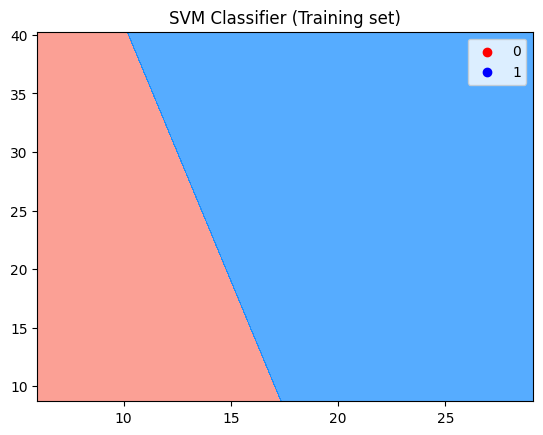

In [ ]:
selected_features = [0, 1]  # Here, 0 corresponds to 'radius_mean' and 1 to 'texture_mean' if they are the first two columns
X_selected = X[:, selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a classifier (SVM in this case)
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Visualization
X1, X2 = np.meshgrid(np.arange(start=X_selected[:, 0].min() - 1, stop=X_selected[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_selected[:, 1].min() - 1, stop=X_selected[:, 1].max() + 1, step=0.01))

Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the training points
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1],
                c=ListedColormap(('red', 'blue'))(i), label=j)

plt.title('SVM Classifier (Training set)')
plt.legend()
plt.show()

